# Data Preprocessing

## Imports and Setup

In [1]:
import os
import sys
sys.path.insert(0, "../utils/")
import geoutils
import cnn_utils
import config

import pandas as pd
import numpy as np
import geopandas as gpd

pd.set_option('mode.chained_assignment', None)
%load_ext autoreload
%autoreload 2

## Parameters

In [2]:
exp_config = '../configs/data/RGB_DOM.yaml'
c = config.load_config(exp_config, prefix='.')

## Data Preparation

In [33]:
bldgs_file = f"bldgs_ortho_LCA.gpkg"
bldgs_path = os.path.join(c['vectors_dir'], bldgs_file)
bldgs = gpd.read_file(bldgs_path).reset_index(drop=True)
bldgs["roof_type"] = None
bldgs["roof_material"] = None
bldgs["roof_condition"] = None
bldgs["UID"] = bldgs.index
print(f"Dimensions: {bldgs.shape}")
bldgs.head(3)

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.



Dimensions: (69294, 6)


UID shape_name roof_type roof_material roof_condition   
0  0.0    Laborie       NaN           NaN            NaN  \
1  1.0    Laborie       NaN           NaN            NaN   
2  2.0    Laborie       NaN           NaN            NaN   

                                            geometry  
0  MULTIPOLYGON Z (((717760.366 1520511.462 0.000...  
1  MULTIPOLYGON Z (((717797.038 1520510.844 0.000...  
2  MULTIPOLYGON Z (((717926.809 1520525.188 0.000...

In [37]:
columns = ['UID','geometry', 'roof_type', 'roof_material', 'roof_condition', 'area']
bldgs_file = f"bldgs_ortho_LCA_new.gpkg"
filepath = os.path.join(c['vectors_dir'],  bldgs_file)
bldgs = bldgs[bldgs.columns[::-1]]
bldgs.to_file(filepath, driver='GPKG')
bldgs.head(3)

UID shape_name roof_type roof_material roof_condition   
0  0.0    Laborie       NaN           NaN            NaN  \
1  1.0    Laborie       NaN           NaN            NaN   
2  2.0    Laborie       NaN           NaN            NaN   

                                            geometry  
0  MULTIPOLYGON Z (((717760.366 1520511.462 0.000...  
1  MULTIPOLYGON Z (((717797.038 1520510.844 0.000...  
2  MULTIPOLYGON Z (((717926.809 1520525.188 0.000...

## Inspect Data Annotations

In [11]:
exp_config = '../configs/data/RGB_LCA.yaml'
c = config.load_config(exp_config, prefix='.')
filename = os.path.join(c['csv_dir'], f"{c['config_name']}.csv")
rgb_data = pd.read_csv(filename)
print(rgb_data.shape)
rgb_data.head(3)

(5175, 8)


UID  aoi                                           filepath   
0  1423  LCA  ./data/tiles/RGB_LCA\LCA-1423-NO_ROOF-INCOMPLE...  \
1  2126  LCA  ./data/tiles/RGB_LCA\LCA-2126-NO_ROOF-INCOMPLE...   
2  2200  LCA  ./data/tiles/RGB_LCA\LCA-2200-NO_ROOF-INCOMPLE...   

                          filename image_src roof_type roof_material dataset  
0  LCA-1423-NO_ROOF-INCOMPLETE.tif     ORTHO   NO_ROOF    INCOMPLETE   TRAIN  
1  LCA-2126-NO_ROOF-INCOMPLETE.tif     ORTHO   NO_ROOF    INCOMPLETE   TRAIN  
2  LCA-2200-NO_ROOF-INCOMPLETE.tif     ORTHO   NO_ROOF    INCOMPLETE   TRAIN

In [15]:
attributes = ['roof_material', 'dataset']
value_counts = rgb_data.groupby(attributes)[attributes[-1]].value_counts()
value_counts = pd.DataFrame(value_counts).reset_index()
value_counts

roof_material dataset  count
0  CONCRETE_CEMENT    TEST     80
1  CONCRETE_CEMENT   TRAIN    323
2    HEALTHY_METAL    TEST    598
3    HEALTHY_METAL   TRAIN   2396
4       INCOMPLETE    TEST     77
5       INCOMPLETE   TRAIN    312
6  IRREGULAR_METAL    TEST    276
7  IRREGULAR_METAL   TRAIN   1113

In [16]:
rgb_data['roof_material'].value_counts()

roof_material
HEALTHY_METAL      2994
IRREGULAR_METAL    1389
CONCRETE_CEMENT     403
INCOMPLETE          389
Name: count, dtype: int64

In [17]:
rgb_data['dataset'].value_counts()

dataset
TRAIN    4144
TEST     1031
Name: count, dtype: int64

In [13]:
exp_config = '../configs/data/LIDAR_LCA.yaml'
c = config.load_config(exp_config, prefix='.')
filename = os.path.join(c['csv_dir'], f"{c['config_name']}.csv")
lidar_data = pd.read_csv(filename)
lidar_data.head(3)

UID  aoi                                           filepath   
0  1423  LCA  ./data/tiles/LIDAR_LCA\LCA-1423-NO_ROOF-INCOMP...  \
1  2126  LCA  ./data/tiles/LIDAR_LCA\LCA-2126-NO_ROOF-INCOMP...   
2  2200  LCA  ./data/tiles/LIDAR_LCA\LCA-2200-NO_ROOF-INCOMP...   

                          filename image_src roof_type roof_material dataset  
0  LCA-1423-NO_ROOF-INCOMPLETE.tif     LIDAR   NO_ROOF    INCOMPLETE   TRAIN  
1  LCA-2126-NO_ROOF-INCOMPLETE.tif     LIDAR   NO_ROOF    INCOMPLETE   TRAIN  
2  LCA-2200-NO_ROOF-INCOMPLETE.tif     LIDAR   NO_ROOF    INCOMPLETE   TRAIN

## Inspect Image Crops

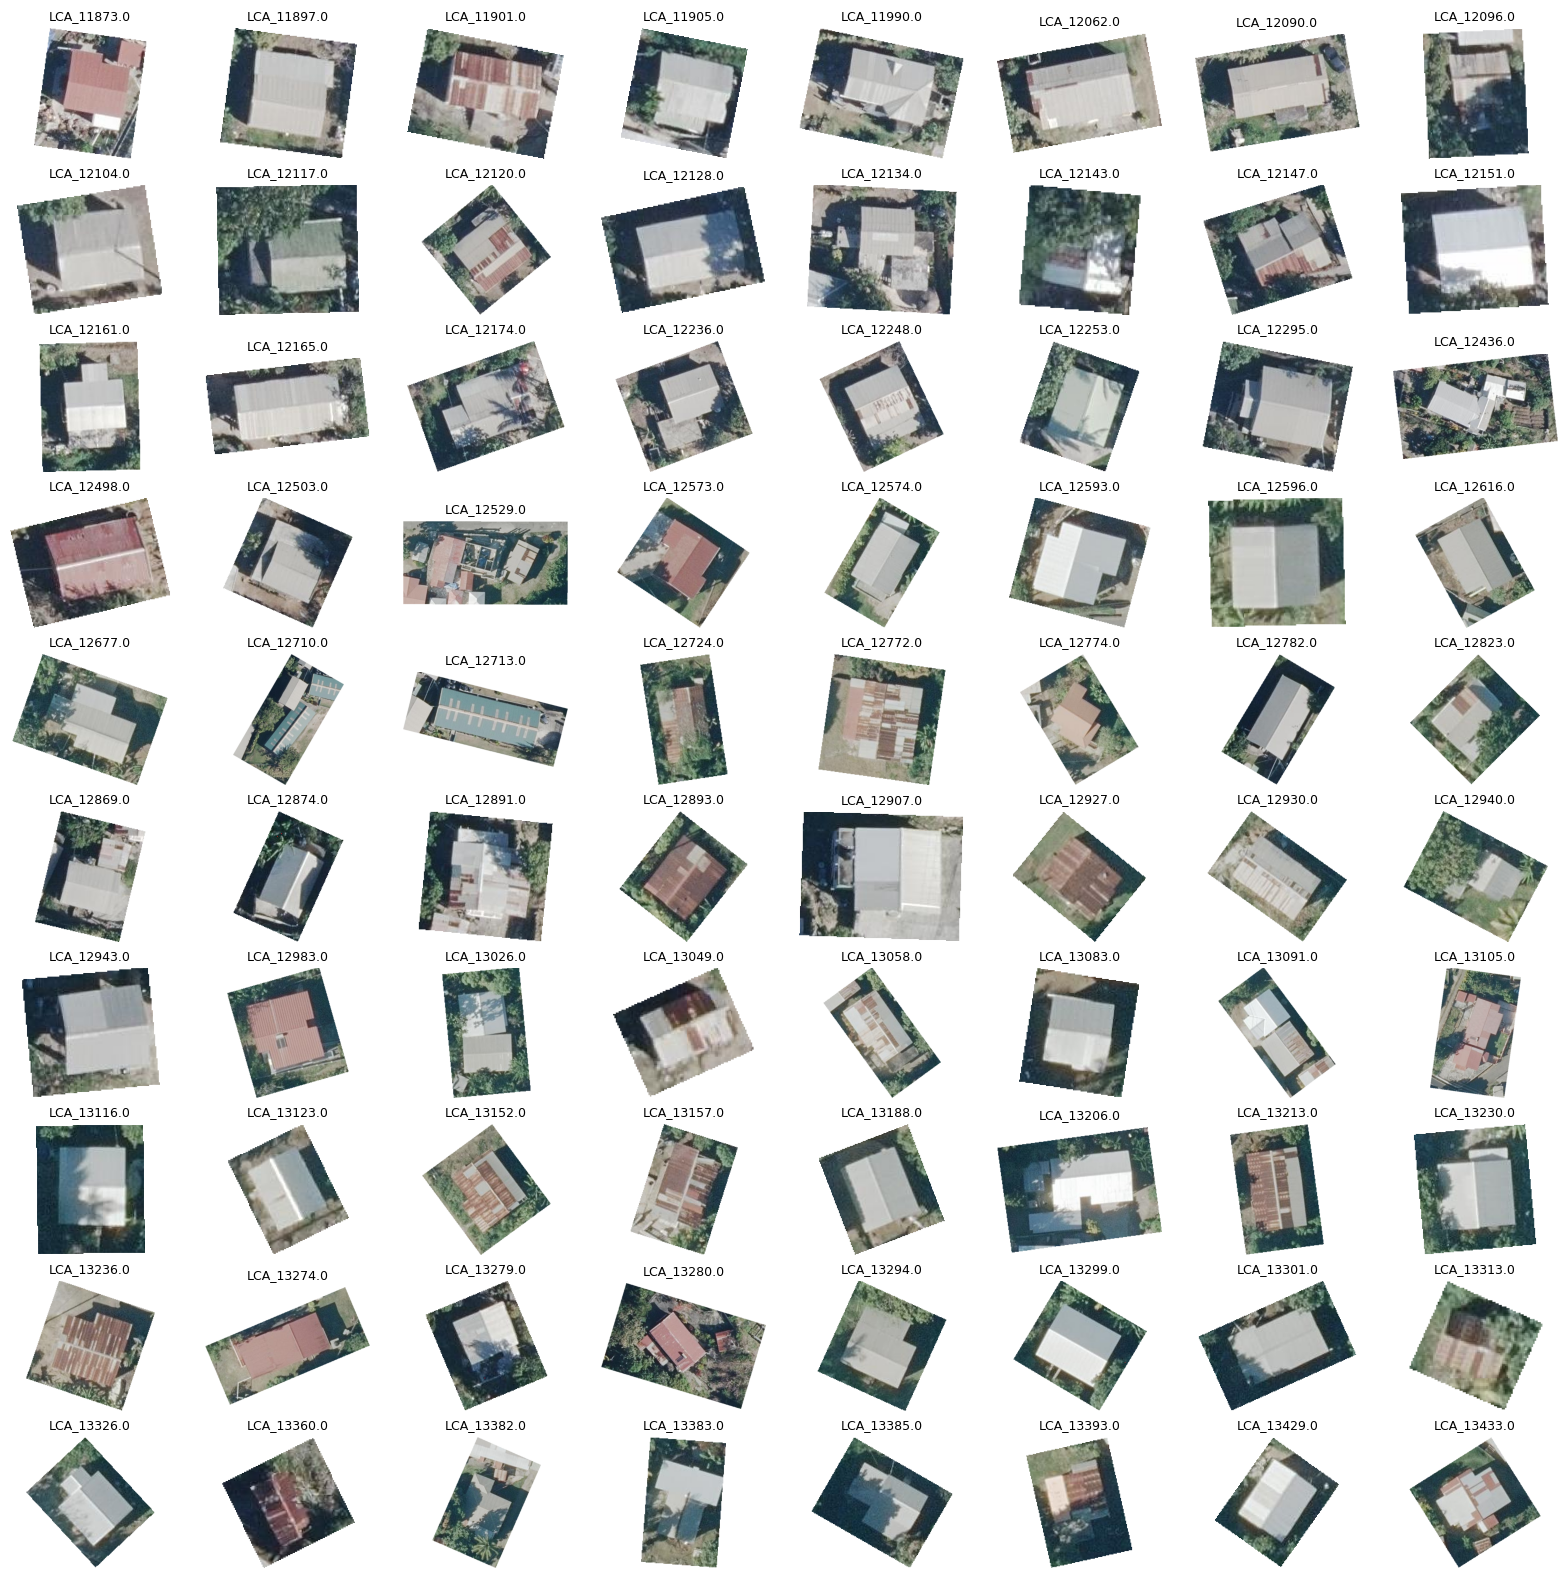

In [15]:
geoutils.inspect_image_crops(
    rgb_data,
    column='roof_type',
    value='GABLE',
    index=160, 
    n_rows=5,
    n_cols=8,
    figsize=(20,20),
    prefix='.',
    lidar_data=lidar_data,
)

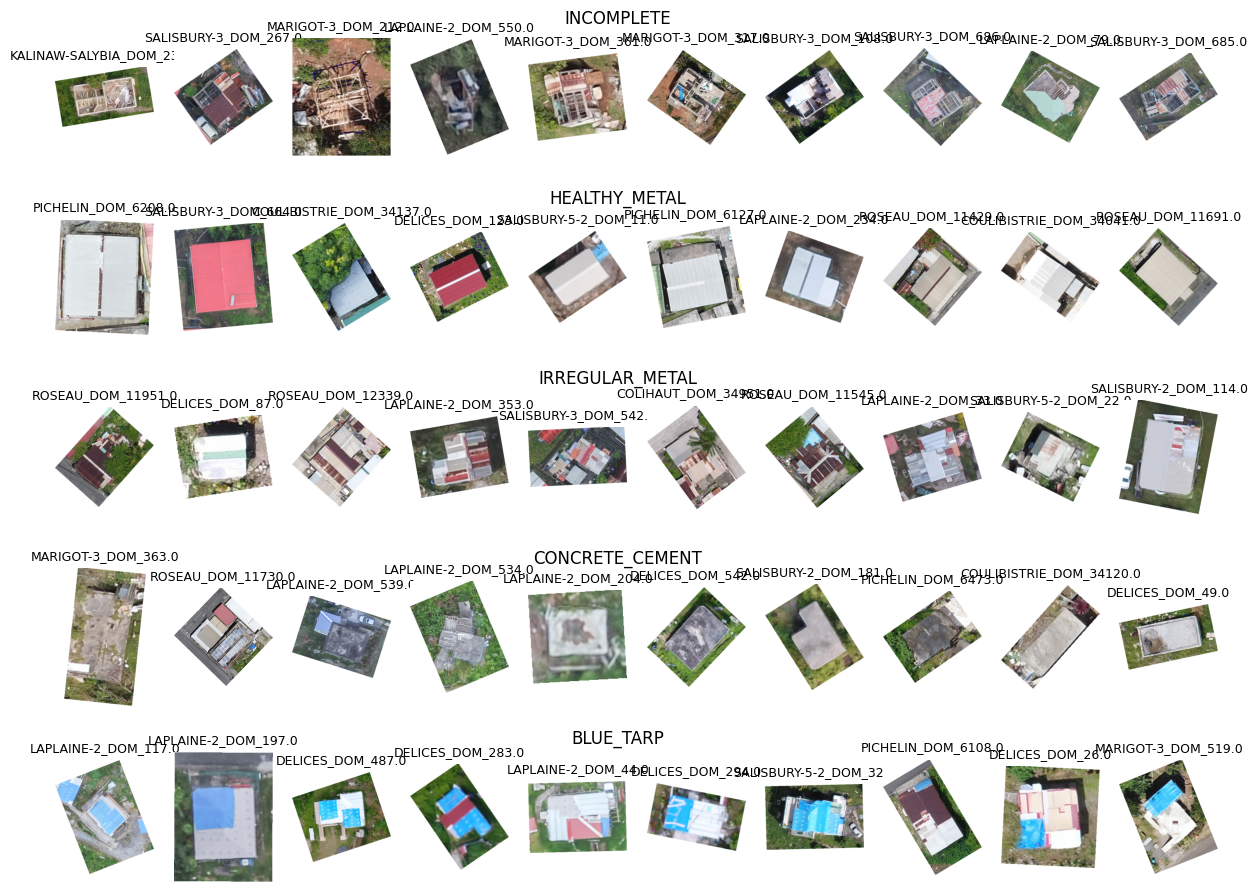

In [8]:
n_samples = 10
geoutils.visualize_image_crops(
    rgb_data[rgb_data.image_src == 'DRONE'], 
    'roof_material', 
    n_samples=10, 
    n_channels=3, 
    figsize=(15,9),
    prefix='.'
)

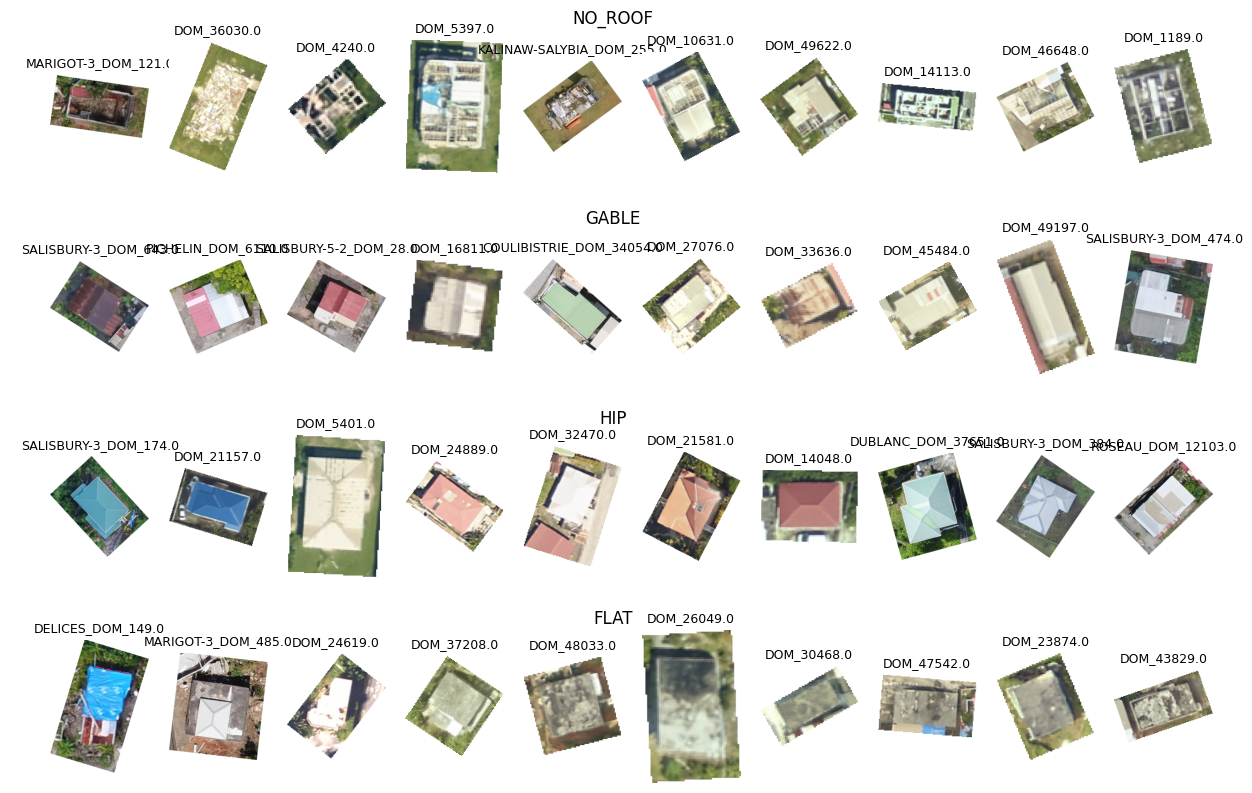

In [57]:
geoutils.visualize_image_crops(
    rgb_data, 
    'roof_type', 
    n_samples=10, 
    n_channels=3, 
    figsize=(15,8),
    prefix='.'
)

C:\Users\Issa\Documents\Projects\GFDRR\caribbean-rooftop-classification\notebooks\../utils\geoutils.py:47: RuntimeWarning: overflow encountered in multiply
  image = image.read([1]) * 255


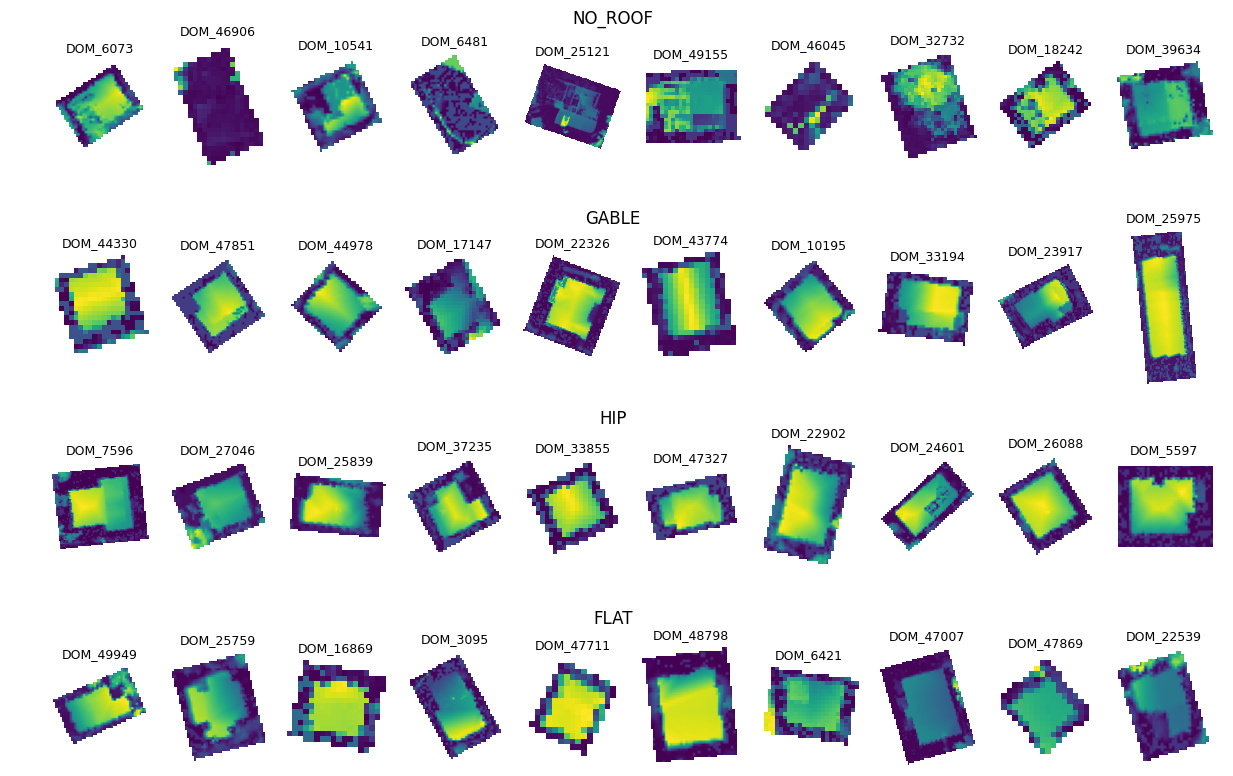

In [92]:
geoutils.visualize_image_crops(
    lidar_data, 
    'roof_type', 
    n_samples=10, 
    n_channels=1, 
    figsize=(15,8),
    prefix='.'
)